In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


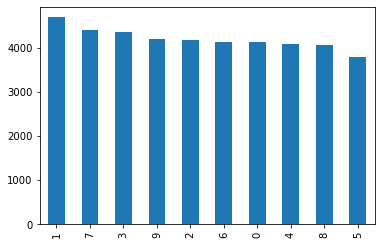

In [4]:
train['label'].value_counts().plot.bar()

In [5]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [6]:
print(train.isnull().any().describe())
print(test.isnull().any().describe())

count       785
unique        1
top       False
freq        785
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


In [7]:
X = train.drop(labels=['label'],axis=1)
y = train['label']

del train

In [8]:
# normalizing
X = X/255.0
test = test/255.0

In [9]:
# reshaping images in 3 dimensions (height=28px, width=28px, canal=1)
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
from sklearn.model_selection import train_test_split
random_seed = 2
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=random_seed)

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [12]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.02110316,  0.03902546,  0.08308768, -0.06012903, -0.4318295 ,
        -0.7361241 , -0.23252049,  0.21222931, -0.05529631, -0.1562036 ]],
      dtype=float32)

In [13]:
# Convert the logits into probabilities
tf.nn.softmax(predictions).numpy()

array([[0.10871796, 0.11545555, 0.12065653, 0.10455687, 0.07209831,
        0.05318286, 0.08800026, 0.13728918, 0.10506339, 0.09497908]],
      dtype=float32)

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [15]:
loss_fn(y_train[:1], predictions).numpy()

2.2531915

In [16]:
model.compile(optimizer='adam',
             loss=loss_fn,
             metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1182/1182 [==============================] - 2s 1ms/step - loss: 0.3552 - accuracy: 0.8985
Epoch 2/5
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1706 - accuracy: 0.9498
Epoch 3/5
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1265 - accuracy: 0.9625
Epoch 4/5
1182/1182 [==============================] - 2s 1ms/step - loss: 0.1007 - accuracy: 0.9685
Epoch 5/5
1182/1182 [==============================] - 2s 2ms/step - loss: 0.0830 - accuracy: 0.9753


In [18]:
model.evaluate(x_val,  y_val, verbose=2)

132/132 - 0s - loss: 0.0919 - accuracy: 0.9743


[0.09190007299184799, 0.9742857217788696]

In [19]:
predictions = model.predict(test)

In [20]:
np.argmax(predictions[0])

2

In [21]:
print(type(predictions))
print(predictions.shape)

<class 'numpy.ndarray'>
(28000, 10)


In [22]:
result = pd.DataFrame()
for i in range(0,len(predictions)):
    result = result.append([
        {'ImageId': i+1, 'Label': np.argmax(predictions[i])}],
    ignore_index=True)

In [23]:
result.to_csv('mytestresults.csv', index=False)

In [24]:
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
